In [1]:
%matplotlib inline
import pandas
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn.ensemble.forest import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.ensemble import ExtraTreesRegressor

In [2]:
names1 = ['brown1','other11','white1','other21','black1','Xc1','Yc1','circularity1','area1','aspectR1','round1','a1','b1','hardness',
         'blac1k1','X1c1','Y1c1','circularit1y1','area11','aspectR11','round11','hardness1','rr','t','z']
names2 = ['brown','other1','white','other2','black','a1','hardness','bro2wn1','other211','whit2e1','other221','blac2k1','X2c1','Yc21']
names = ['brown1','other11','white1','other21','black1','Xc1','Yc1','circularity1','area1','aspectR1','round1','hardness']
names3 = ['brown1','other11','white1','other21','black1','hardness','s','ss','sss','w','ww','qq','qqq','www']
data = pandas.read_csv('C:/filter/damast_2_PM.csv',names=names)

FileNotFoundError: File b'C:/filter/damast_2_PM.csv' does not exist

In [65]:
print(data.shape)

(181, 12)


In [66]:
array = data.values
X = array[:,0:11]
#X = preprocessing.normalize(X)
y = array[:,11]
validation_size = 0.33
seed = 4
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,test_size = validation_size,random_state=seed)

In [9]:
#adaboost with decision tree
reg2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=300)

In [81]:
#random forest regressor
reg6= RandomForestRegressor(max_depth=2)

In [82]:
akc2 = reg2.fit(X_train, y_train)
akc6 = reg6.fit(X_train, y_train)

In [83]:
y_pred2 = akc2.predict(X_test)
y_pred6 = akc6.predict(X_test)

In [84]:
explained_variance_score(y_test, y_pred2)
r2_score(y_test, y_pred2)

0.81902886150674736

In [85]:
explained_variance_score(y_test, y_pred6)
r2_score(y_test, y_pred6)

0.75192114473136829

In [86]:
data1 = pandas.read_csv('C:/filter/damast_2_PM_t.csv',names=names)
print(data1.shape)

(16, 12)


In [87]:
array = data1.values
Xi = array[:,0:11]
yi = array[:,11]
#scaler.fit(Xi)
#Xi = scaler.transform(Xi)
#Xi = preprocessing.normalize(Xi)

In [88]:
prr2 = akc2.predict(Xi)
prr6 = akc6.predict(Xi)
print (prr2)
print (prr6)

[ 678.          749.          716.30769231  715.19230769  702.22222222
  708.          697.55813953  662.          839.          720.          537.
  550.          554.42105263  524.5         550.          523.        ]
[ 681.90563551  692.16758544  692.16758544  692.16758544  637.23550288
  659.71473385  697.56656597  659.71473385  873.46003019  667.4883079
  548.30683539  594.96968688  548.30683539  578.08855481  626.47484575
  578.08855481]


In [89]:
print (yi)

[ 818.  725.  657.  693.  647.  708.  691.  709.  839.  845.  556.  539.
  581.  534.  520.  514.]


In [90]:
explained_variance_score(yi, prr2)
r2_score(yi, prr2)

0.75179923530033876

In [91]:
#explained_variance_score(yi, prr2)
r2_score(yi, prr6)

0.58041606234619203

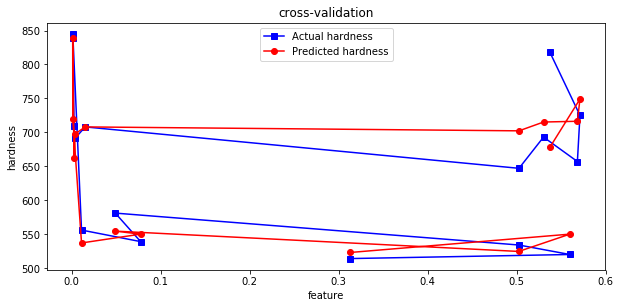

In [92]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.plot(Xi[:,0],yi, c='b', marker="s",label='Actual hardness')
plt.plot(Xi[:,0],prr2, c='r', marker="o",label='Predicted hardness')
plt.xlabel("feature")
plt.ylabel("hardness")
plt.title("cross-validation")
plt.legend()
plt.show()

Automatically created module for IPython interactive environment


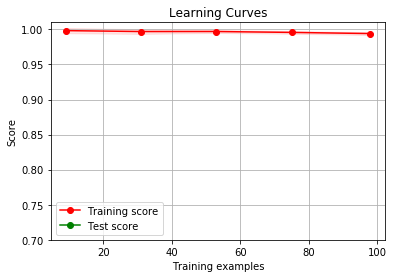

In [1196]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.learning_curve import learning_curve


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Test score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves"
cv = cross_validation.ShuffleSplit(y.data.shape[0], n_iter=100,random_state=6)
estimator = reg2
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=1)

plt.show()

In [ ]:
from sklearn.utils.testing import all_estimators
from sklearn import base

estimators = all_estimators()

for name, class_ in estimators:
    if issubclass(class_, base.RegressorMixin):
        print(name)

In [10]:
import pandas
pandas._version_

AttributeError: module 'pandas' has no attribute '_version_'